<a href="https://colab.research.google.com/github/1iushuran/IEOR231-Assignment/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a id='toc1_'></a>[IEOR 231 (25spring) Assignment 1](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [IEOR 231 (25spring) Assignment 1](#toc1_)    
  - [Description](#toc1_1_)    
  - [Q1: Trading stocks (Mandatory)](#toc1_2_)    
    - [(a)](#toc1_2_1_)    
    - [(b)](#toc1_2_2_)    
    - [(c)](#toc1_2_3_)    
    - [(d)](#toc1_2_4_)    
    - [(e)](#toc1_2_5_)    
    - [(f)](#toc1_2_6_)    
  - [Q2: Covariance matrix (Optional)](#toc1_3_)    
    - [(a)](#toc1_3_1_)    
    - [(b)](#toc1_3_2_)    
    - [(c)](#toc1_3_3_)    
    - [(d)](#toc1_3_4_)    
  - [Q3: More on momentum trading (Optional)](#toc1_4_)    
    - [(a)](#toc1_4_1_)    
    - [(b)](#toc1_4_2_)    
    - [(c)](#toc1_4_3_)    
    - [(d)](#toc1_4_4_)    
  - [Q4: Volatility loss (Optional)](#toc1_5_)    
    - [(a)](#toc1_5_1_)    
    - [(b)](#toc1_5_2_)    
    - [(c)](#toc1_5_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Description](#toc0_)

## <a id='toc1_2_'></a>[Q1: Trading stocks (Mandatory)](#toc0_)

Below you are given prices of 3 stocks (APPLE, AMAZON, NVIDIA) in the year of 2018. We have calculated the daily return of each stock for you as df_aapl, df_amzn and df_nvda.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/IEOR231/A1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import the dataset
df = pd.read_csv(
    "assignment1_df_2018.csv"
)  # make sure you have this csv file downloaded

In [4]:
# select all APPL, AMZN, NVDA rows separately
def get_returns(df, stock_name):
    df_tmp = df[df["stock_name"] == stock_name]
    res = df_tmp["price_close"].pct_change()
    return res.reset_index(drop=True).drop(index=0)


df_aapl = get_returns(df, "AAPL")
df_amzn = get_returns(df, "AMZN")
df_nvda = get_returns(df, "NVDA")

### <a id='toc1_2_1_'></a>[(a)](#toc0_)
Calculate sample means $\hat{\mu}\in\mathbb{R}^3$ and the sample covariance matrix $\hat\Sigma\in\mathbb{R}^{3\times3}$ for 3 stocks.

In [5]:
# Combine the returns into a DataFrame
returns = pd.concat([df_aapl, df_amzn, df_nvda], axis=1)
returns.columns = ['AAPL', 'AMZN', 'NVDA']

# sample means for each stock
mu_hat = returns.mean()

# Calculate the sample covariance matrix (Sigma_hat) for the stocks
Sigma_hat = returns.cov()

print("sample Means: ")
print(mu_hat)
print("\nsample covariance matrix:")
print(Sigma_hat)


sample Means: 
AAPL   -0.000189
AMZN    0.001194
NVDA   -0.001109
dtype: float64

sample covariance matrix:
          AAPL      AMZN      NVDA
AAPL  0.000328  0.000273  0.000289
AMZN  0.000273  0.000518  0.000451
NVDA  0.000289  0.000451  0.000960


**Hence, the sample means is $$\hat{\mu} = [ -0.000189, 0.001194, -0.001109]^T$$** <br> **the sample covariance matrix**
$$\hat\Sigma = \begin{bmatrix} 0.000328 & 0.000273 & 0.000289 \\ 0.000273 & 0.00518 & 0.00451 \\ 0.000289 & 0.000451 & 0.000960 \end{bmatrix}$$

### <a id='toc1_2_2_'></a>[(b)](#toc0_)

Plot the histogram of returns of NVIDIA, and compare it with a normal distribution. Do you think it is normally distributed?

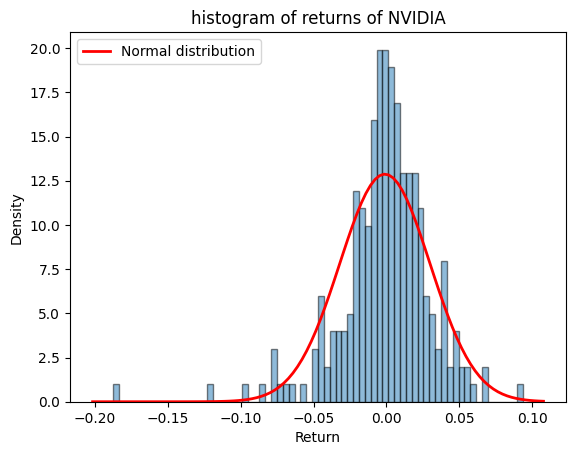

In [6]:
# NVIDIA's mean and std
mu_nvd = df_nvda.mean()
std_nvd = df_nvda.std()

# plot the histogram
plt.title('histogram of returns of NVIDIA')
plt.hist(df_nvda, bins=70, density=True,alpha=0.5, edgecolor='black')

# plot the curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x,  mu_nvd, std_nvd)

plt.plot(x, p, color='red', linewidth=2, label='Normal distribution')
plt.xlabel('Return')
plt.ylabel('Density')
plt.legend()

plt.show()

**This returns are not perfectly normally distributed because the distribution appears left skewed. Also, it has a fat tail so this distribution has more extreme outcomes than the normal distribution**

**Therefore, it is not very normal.**


No matter what your answer in (b) is, in the rest of Q1, let's always assume the return vector of 3 stocks $R\in\mathbb{R}^3$ follows a jointly normal distribution ${N}(\hat{\mu},\hat{\Sigma})$, where $\hat{\mu},\hat{\Sigma}$ are what you estimated from part (a).

Suppose you want to invest on these 3 stocks in 2019 using the data from 2018. You are considering a simplified model that the daily returns in 2019 are i.i.d. random variables drawn from ${N}(\hat{\mu},\hat{\Sigma})$, and let's assume there are 252 trading days in 2019.

### <a id='toc1_2_3_'></a>[(c)](#toc0_)

Consider the following "momentum trading" strategy:

* At day $t$, after you know the return of APPLE at that day, if it is positive, you immediately long(buy) 1 dollar APPLE, otherwise you short(sell) 1 dollar APPLE.

* For example, at day 1, if the return of APPLE is 0.01, you will buy 1 dollar APPLE; At day 2, if the return is -0.02, two things happen:

    1. Your investment in APPLE becomes 0.98 dollar;
    
    2. You will short 1 dollar APPLE.

    Then your investment in APPLE becomes -0.02 dollar. Your PnL (profit and loss) is -1+1-0.02=-0.02

Now, simulate for $N=252$ trading days with above trading strategy and evaluate your results with enough replications. What is the expectation and the standard deviation of PnL of this strategy? Give a $95\%$ confidence interval for the expectation of PnL.

In [7]:
# Single run of our momentum trading
def momentum_trading(mean_aapl, var_aapl, N):
    investment = 0.0
    cash = 0.0
    returns = np.random.normal(loc=mean_aapl,scale=np.sqrt(var_aapl),size=N)

    for r in returns:
        if r > 0:
            cash -= 1.0
            investment += 1.0 * 1
        else:
            cash += 1.0
            investment -= 1.0
        investment *= (1 + r)
    return investment + cash


# Simulate the single run with replications
def simulate_momentum_trading(mean_aapl, var_aapl, N, replications):
    pnl = []
    for _ in range(replications):
        pnl.append(momentum_trading(mean_aapl, var_aapl, N))
    return np.array(pnl)

In [8]:
# get the apple var and mean
mean_aapl = df_aapl.mean()
var_aapl = df_aapl.var()
print(f"mean of AAPL: {mean_aapl}")
print(f"var of AAPL: {var_aapl}")

# set the parameters
num_sim = 10000
N = 252

# simulate
pnl_results = simulate_momentum_trading(mean_aapl, var_aapl, N, num_sim)

mean of AAPL: -0.00018865456709516338
var of AAPL: 0.0003279354432947036


In [9]:
# stat of the results
mean_pnl = np.mean(pnl_results)
std_pnl = np.std(pnl_results)
se_pnl = std_pnl / np.sqrt(num_sim)
alpha = 0.05
z_crit = norm.ppf(1 - alpha/2)
ci = z_crit * se_pnl

print(f"expection: {mean_pnl:.4f}")
print(f"std dev: {std_pnl:.4f}")
print(f"95% ci: ({mean_pnl - ci:.4f}, {mean_pnl + ci:.4f})")

expection: 3.5961
std dev: 3.1817
95% ci: (3.5337, 3.6584)


**After replicating for 10000 times, the expection of PnL is 3.6513 and its standard deviation is 3.2960. The 95% confidence interval for the expectation of PnL is (3.5867, 3.7159)**

### <a id='toc1_2_4_'></a>[(d)](#toc0_)

Suppose, I short 1 dollar APPLE and hold for 252 trading days, what's my expected PnL and standard deviation? You can either do this through simulation or mathematics. Compare this with the momentum trading strategy, what do you find?

In [10]:
# short 1 APPLE and hold 252 days
def simulate_short_aapl(mean_aapl, var_aapl, replications, N=252):
    pnl_list = []

    for _ in range(replications):
        # AAPL returns
        returns = np.random.normal(loc=mean_aapl,scale=np.sqrt(var_aapl),size=N)
        pnl=1-np.prod(1+returns)
        pnl_list.append(pnl)

    return np.array(pnl_list)

In [11]:
# implement the simulation using the parametes in the (c)
pnl_short_aapl = simulate_short_aapl(mean_aapl, var_aapl, num_sim)

# stat
mean_pnl_d = np.mean(pnl_short_aapl)
std_pnl_d = np.std(pnl_short_aapl)
se_d = std_pnl_d / np.sqrt(num_sim)
ci_lower = mean_pnl_d - z_crit * se_d
ci_upper = mean_pnl_d + z_crit * se_d

print(f"expectation: {mean_pnl_d:.4f}")
print(f"std dev: {std_pnl_d:.4f}")
print(f"95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")

expectation: 0.0460
std dev: 0.2748
95% CI: [0.0406, 0.0514]


**Based on the two statistics results in c and d, we can see that:**

**In terms of expected returns, momentum strategy in (c) is larger than short and hold in (c) and the CI in (c) is wider than (d)**

**Therefore, the momentum trading approach in (c) with higher profits outperforms shorting Apple for that year in (d) with a iid assumptions given similar risk**


### <a id='toc1_2_5_'></a>[(e)](#toc0_)

Now, suppose Alice is a portfolio manager who only invests in these 3 stocks. She uses the same assumptions as you (i.i.d. jointly normal distributed returns). Her strategy is as follows:

* At day $t$, after know the return vector $R_t=(r_{1t}, r_{2t}, r_{3t})^\top\in\mathbb{R}^3$, find out stocks perform the best/worst at day $t$, and long the best 1 dollar and short the worst 1 dollar;

* For example, if at day 1, the returns of APPLE, AMAZON, NVIDIA are 0.01, -0.01, 0.02, respectively, then Alice will long 1 dollar NVIDIA and short 1 dollar AMAZON.

Using simulation to find out the expectation and the standard deviation of Alice's PnL in 2019.

In [12]:
# Alice's strategy
def alice_strategy_simulation(mu, cov, replications, N=252):
    pnl_results = []

    for _ in range(replications):
        returns = np.random.multivariate_normal(mu, cov, size=N)
        daily_pnl = returns.max(axis=1) - returns.min(axis=1)
        total_pnl = np.sum(daily_pnl)
        pnl_results.append(total_pnl)

    return np.array(pnl_results)

In [13]:
# excute the simulation using the previous defined parameters
mu = mu_hat.values
cov = Sigma_hat.values
alice_pnl_results = alice_strategy_simulation(mu, cov, num_sim)

# stat of the results
mean_pnl_e = np.mean(alice_pnl_results)
std_pnl_e = np.std(alice_pnl_results)
se_e = std_pnl_e / np.sqrt(len(alice_pnl_results))
ci_lower_e = mean_pnl_e - z_crit * se_e
ci_upper_e = mean_pnl_e + z_crit * se_e

print(f"expectation: {mean_pnl_e:.4f}")
print(f"std dev: {std_pnl_e:.4f}")
print(f"95% CI: ({ci_lower_e:.4f}, {ci_upper_e:.4f})")

expectation: 6.8583
std dev: 0.2394
95% CI: (6.8536, 6.8630)


**The expectation of Alice's PnL is 6.8546 and the standard deviation is 0.2390**

### <a id='toc1_2_6_'></a>[(f)](#toc0_)



Below we provide real data of 2019. Repeat (c) and (e) using the real data instead of simulation. Compare the results with real data and simulations. Do you have any comment?

In [14]:
df_2019 = pd.read_csv("assignment1_df_2019.csv")
df_aapl_2019 = get_returns(df_2019, "AAPL")
df_amzn_2019 = get_returns(df_2019, "AMZN")
df_nvda_2019 = get_returns(df_2019, "NVDA")

In [15]:
# momentum trading with 2019 data instead of simulation
def momentum_trading(returns):
    investment = 0.0
    cash = 0.0

    for r in returns:
        if r > 0:
            cash -= 1.0
            investment += 1.0 * 1
        else:
            cash += 1.0
            investment -= 1.0
        investment *= (1 + r)
    return investment + cash

In [16]:
# # mean and var in 2019
# mean_aapl_2019 = df_aapl_2019.mean()
# var_aapl_2019 = df_aapl_2019.var()

# # actual trading days in 2019
# def get_actual_trading_days(df, stock_name):
#     df_stock = df[df["stock_name"] == stock_name].sort_values("date")
#     return len(df_stock["price_close"].dropna()) - 1

# actual_days_aapl = get_actual_trading_days(df_2019, "AAPL")
# print(f"actual trading days for aapl: {actual_days_aapl}")

In [17]:
# calculate the pnl
real_pnl_2019 = momentum_trading(df_aapl_2019)
print(real_pnl_2019)

18.2108218794408


In [18]:
# # Visualize the comparisons for Momentum
# plt.figure(figsize=(10,6))
# plt.hist(pnl_results, bins=50, density=True, alpha=0.6, label='simulation 2018')
# plt.axvline(real_pnl_2019, color='r', linestyle='--', label='real 2019')
# plt.title("Momentum Stategyes 2018 Simulation vs. 2019 Real Data")
# plt.xlabel("Total PnL")
# plt.ylabel("Density")
# plt.legend()
# plt.show()

**Accoding to the calculation, the real PnL is above the mean of the simulation**

**Therefore, the actual 2019 result was better than the models expected in part c.**

In [19]:
# portfolio trading with 2019 data instead of simulation
def alice_strategy(returns):
    daily_pnl = returns.max(axis=1) - returns.min(axis=1)
    total_pnl = daily_pnl.sum()
    return total_pnl

In [20]:
# get the returns
aapl_2019 = df_aapl_2019.values
amzn_2019 = df_amzn_2019.values
nvda_2019 = df_nvda_2019.values
returns_2019 = np.column_stack([aapl_2019, amzn_2019, nvda_2019])

In [21]:
alice_pnl_2019 = alice_strategy(returns_2019)
print(alice_pnl_2019)

5.128639809240984


In [22]:
# # Visualize the comparisons for Momentum
# plt.figure(figsize=(10,6))
# plt.hist(alice_pnl_results, bins=50, density=True, alpha=0.6, label='simulation 2018')
# plt.axvline(alice_pnl_2019, color='r', linestyle='--', label='real 2019')
# plt.title("Alice Stategyes 2018 Simulation vs. 2019 Real Data")
# plt.xlabel("Total PnL")
# plt.ylabel("Density")
# plt.legend()
# plt.show()

**It was significantly below what we simulated using 2018 data.**

* Below are optional writing problems.

## <a id='toc1_3_'></a>[Q2: Covariance matrix (Optional)](#toc0_)

### <a id='toc1_3_1_'></a>[(a)](#toc0_)
In Q1, we estimate the covariance matrix of $K=3$ stocks using $N=251$ days' data through the sample covariance matrix.

In practice, we care about $K>3000$ stocks with sometimes only 10 years' ($N\approx 2520$ days') data. Let's assume the return vector $R$ of $K$ stocks follows $\mathcal{N}(\mu,\Sigma)$, and we still estimate it through the sample covariance matrix:

$$\hat\mu = \frac{1}{N}\sum_{i=1}^N R_i,$$
$$\hat\Sigma = \frac{1}{N}\sum_{i=1}^N(R_i-\hat{\mu})(R_i-\hat{\mu})^\top$$

Show that $\operatorname{rank}(\hat\Sigma)\leq N$.

### <a id='toc1_3_2_'></a>[(b)](#toc0_)
It's known sample covariance matrix is a terrible estimation of $\Sigma$ when $K$ and $N$ have the same order. To see this in our above example, we have
$$\operatorname{rank}(\hat\Sigma)\leq N\approx 2520<3000<K,$$
which means if $\Sigma$ is of full rank (so $\operatorname{rank}(\Sigma)=K$), then our estimaton $\hat\Sigma$ always has much smaller rank!

To deal with this issue, one (actually oversimplified) way is to further assume $\Sigma$ has a very simple structure as follows:

1. The correlation matrix is: $$\operatorname{corr}(R)=re_Ke_K^\top+(1-r)I_K,$$
where $I_K\in\mathbb{R}^{K\times K}$ is the identity matrix, and $e_K\in\mathbb{R}^{K\times 1}$ is a vector with all elements 1.

2. $\Sigma=\operatorname{diag}(\operatorname{Var}(R_1),\cdots,\operatorname{Var}(R_K))^{\frac{1}{2}}\operatorname{corr}(R)\left(\operatorname{diag}(\operatorname{Var}(R_1),\cdots,\operatorname{Var}(R_K))^{\frac{1}{2}}\right)^\top$.

In this way, we only need to estimate variances of each of $K$ stocks and a parameter $r$, in total $K+1$ parameters.

Now, calculate all eigenvalues of $\operatorname{corr}(R)$ and corresponding eigenvectors (in terms of $r$).

### <a id='toc1_3_3_'></a>[(c)](#toc0_)
As we known, the correlation matrix must be positive semi-definite (PSD), i.e. all eigenvalues must be non-negative. Based on your results in (b), what's the possible range of $r$?

### <a id='toc1_3_4_'></a>[(d)](#toc0_)

Also, prove that, for any PSD matrix $A\in\mathbb{R}^{K\times K}$, you can always construct $K$ normally distributed variables, whose covariance matrix is exactly $A$.

## <a id='toc1_4_'></a>[Q3: More on momentum trading (Optional)](#toc0_)


In this question, we provide some theoretical analysis on the momentum trading strategy we mentioned in Q1.

### <a id='toc1_4_1_'></a>[(a)](#toc0_)

Suppose there is a stock whose **price** at day $t$ is given by $p_t$. Now let's define $\Delta_t=p_t-p_{t-1}$, and assume $\Delta_t$ are i.i.d. as $P(\Delta=1)=p$ and $P(\Delta=-1)=1-p$.

Now, our momentum trading strategy is given by:

* At day $t$, after observe $p_t$, if $\Delta_t=1$, we long 1 share at the current price $p_t$ (which means long $p_t$ dollars), otherwise we short 1 share.

* After $N=252$ days, we sell all shares and calculate our PnL.

Now, write down the mathematical formulation of your final PnL in the terms of $\Delta_1,\cdots,\Delta_N$.

### <a id='toc1_4_2_'></a>[(b)](#toc0_)
Based on your results in (a), calculate the expectation and the variance of your final PnL.

### <a id='toc1_4_3_'></a>[(c)](#toc0_)
What is the expectation and the variance of my PnL, if I have 1 share stock at the beginning and simply hold it for 252 days? Compare (b) and (c).

### <a id='toc1_4_4_'></a>[(d)](#toc0_)
In previous parts, we always assume $\Delta$ are i.i.d.; Now, if we still believe all $\Delta_t$ are identically distributed, but assume $\operatorname{Cov}(\Delta_{t-1}, \Delta_t)=\rho>0$ and $\operatorname{Cov}(\Delta_{t-j}, \Delta_t)=0$ for $j>1$, what will happen to your expected PnL?

## <a id='toc1_5_'></a>[Q4: Volatility loss (Optional)](#toc0_)

Suppose we are investing a stock. The daily returns $R_i$ of the stock are i.i.d. as $P(R=0.5)=0.5$ and $P(R=-0.5)=-0.5$. Suppose we invest 1 dollar at day 0. Then after $N$ days it becomes $V_N=\Pi_{i=1}^N(1+R_i)$.

### <a id='toc1_5_1_'></a>[(a)](#toc0_)

Show that $\mathbb{E}V_N=1$.

### <a id='toc1_5_2_'></a>[(b)](#toc0_)
Instead, show that the geometric mean $V_N^{\frac{1}{N}}$ converges to some $\rho_{0.5}<1$ almost surely as $N\to+\infty$.

(Hint: the strong law of large number says, for i.i.d. random variables $X_i$ with $\mathbb{E}\vert X\vert<+\infty$, $\frac{1}{N}\sum_{i=1}^N{X_i}$ converges to $\mathbb{E}X$ almost surely as $N\to+\infty$.)

* Remark: (a) and (b) show that, though in expectation we will not lose money, but in the long run we will almost surely lose money.

### <a id='toc1_5_3_'></a>[(c)](#toc0_)

If now we believe this stock is more volatile, so we assume $P(R=0.9)=0.5$ and $P(R=-0.9)=-0.5$, show that $V_N^{\frac{1}{N}}$ now converges to some $\rho_{0.9}<\rho_{0.5}$ almost surely as $N\to+\infty$.